# Regession logistique

Par Serigne DIOP

### Choix du modéle

Modèle statistique rapide et efficace, idéal pour les problèmes de classification binaire. Il fournit des probabilités, mais suppose une séparation linéaire des classes, ce qui peut être limitant.

Contrairement à la régression linéaire qui prédit des valeurs continues, la régression logistique prédit des probabilités et applique une transformation sigmoïde pour obtenir une sortie entre 0 et 1
Si la probabilité est > 0.5, on classe l’observation en 1 (Présence de cancer) Sinon, elle est classée en 0 (Pas de cancer)

$\huge
p(y = 1 | x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}}$

### Importation des librairies

In [6]:
import numpy as np
import pandas as pd
import os
import sys
import pickle  
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [23]:
### Importation des variables

In [2]:
with open('variables.pkl', 'rb') as f:
    (df, X_train, X_test, y_train, y_test,X_train_smote, y_train_smote) = pickle.load(f)

### Instanciation et entrainement

In [9]:
# Entraînement du modèle de régression logistique
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluation du modéle

In [10]:
# Prédictions
y_pred = model_logreg.predict(X_test)
y_prob = model_logreg.predict_proba(X_test)[:, 1]

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de Classification :\n", classification_report(y_test, y_pred))
print("\nMatrice de Confusion :\n", confusion_matrix(y_test, y_pred))


Précision du modèle : 0.86

Rapport de Classification :
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.83      0.71      0.77         7

    accuracy                           0.86        22
   macro avg       0.85      0.82      0.84        22
weighted avg       0.86      0.86      0.86        22


Matrice de Confusion :
 [[14  1]
 [ 2  5]]


### Courbe ROC

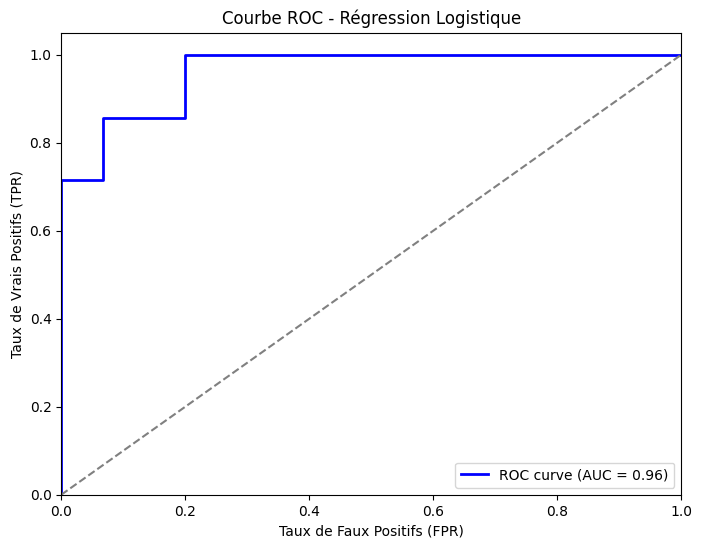

In [5]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

### Interpretation

### Regression logistique avec Cross-Validation


Précision moyenne du modèle : 0.99


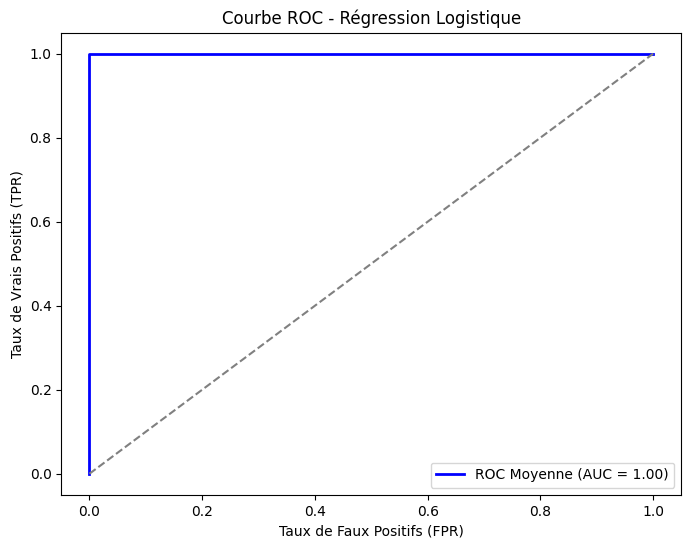

In [8]:
# Initialisation de la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modèle de régression logistique
model_logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Prédictions des probabilités pour chaque fold via cross-validation
y_prob = cross_val_predict(model_logreg, X_train_smote, y_train_smote, cv=cv, method="predict_proba")[:, 1]

# Calcul de la précision moyenne avec validation croisée
accuracies = cross_val_score(model_logreg, X_train_smote, y_train_smote, cv=cv, scoring="accuracy")
mean_accuracy = np.mean(accuracies)

# Courbe ROC globale
fpr, tpr, _ = roc_curve(y_train_smote, y_prob)
roc_auc = auc(fpr, tpr)

# Affichage des résultats
print(f"\nPrécision moyenne du modèle : {mean_accuracy:.2f}")

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Moyenne (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

L'AUC du modèle est de 1, ce qui est supérieur à celui obtenu avec la cross-validation. Cela peut s'expliquer par la petite taille du dataset, qui entraîne un surapprentissage du modèle, le rendant moins généralisable à de nouvelles données